# Overview of Library Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import gensim

In [2]:
catalog_df = pd.read_excel('data/workshop_data.xlsx')
catalog_df.sample(3)

title             authors  \
18125  Havana project : architecture again - Internat...  Peter Noever 1941-   
7641                               Spray drying handbook   K Masters (Keith)   
15896                    Finite elements in geomechanics           G Gudehus   

       year      OCLC                 publisher  \
18125  1995  60298959        Prestel Publishing   
7641   1991  26396285  Longman Publishing Group   
15896  1977   2798899         John Wiley & Sons   

                                             description  \
18125  The city of Havana represents a real challenge...   
7641                                                 NaN   
15896                                                NaN   

                                             topic  \
18125  architecture urbanism and physical planning   
7641                                       physics   
15896                                  geosciences   

                                             sub_topic  \
18125  architecture urbanism physical planning general   
7641                     physics of process technology   
15896                              engineering geology   

                                           sub_sub_topic std_call_number  \
18125  architecture urban design and physical plannin...          VBA196   
7641                        technical drying evaporation          FKE191   
15896                                     rock mechanics          SWJ177   

       shelf  times_lent_since_2022               cover_file  
18125    776                    NaN  776/cover_60298959.webp  
7641     319                    NaN  319/cover_26396285.webp  
15896    683                    NaN   683/cover_2798899.webp

## Clean up data

The dataset appears to have a few not-a-number entries that may create issues for us later on. We can replace them with appropriate null entries. For text, let's try an empty string (`''` or `""`) and for numbers, let's try zero.

In [3]:
replacement_values = {"title": "",
                      "authors": "",
                      "OCLC": 0,
                      "publisher": "",
                      "description": "",
                      "topic": "",
                      "sub_topic": "",
                      "sub_sub_topic": "",
                      "std_call_number": "",
                      "shelf": 0,
                      "times_lent_since_2022": 0,
                      "cover_file": "",
                     }

catalog_df = catalog_df.fillna(value=replacement_values)
catalog_df.sample(5)

title  \
22382      A practical guide to Dutch building contracts   
2314            Fuzzy clustering models and applications   
15461                          Atmosphere-ocean dynamics   
2245   Planning with Markov decision processes : an A...   
4356                      De republiek der kerngeleerden   

                                                 authors  year       OCLC  \
22382  AA Boot, EM Bruggeman (Evelien Manon), 1977-, ...  2010  745693919   
2314     Mika Sato 1966-, Yoshiharu Sato 1946-, L C Jain  1997   36942578   
15461                                      Adrian E Gill  1982    8452392   
2245                      Mausam Kolobov, Andrey Kolobov  2012  905869450   
4356        CD Andriesse (Cornelis Dirk), fysicus, 1939-  2000   67553939   

                          publisher  \
22382                                 
2314                        Physica   
15461                Academic Press   
2245   Morgan & Claypool Publishers   
4356                                  

                                             description  \
22382                                                      
2314   This book presents our most recent research on...   
15461  How the Ocean : Atmosphere System Is Driven --...   
2245   Provides a concise introduction to the use of ...   
4356                                                       

                         topic                sub_topic  \
22382  law and policy sciences                      law   
2314               mathematics  mathematical statistics   
15461              geosciences              meteorology   
2245               mathematics  mathematical statistics   
4356                   physics          physics general   

                           sub_sub_topic std_call_number  shelf  \
22382          planning law building law          ZKP210    932   
2314     classification cluster analysis          CBS197     91   
15461                climatology general          SJG182    665   
2245         statistical decision theory          CBG212     88   
4356   history and philosophy of physics          EBB200    184   

       times_lent_since_2022               cover_file  
22382                    0.0                           
2314                     0.0   91/cover_36942578.webp  
15461                    0.0   665/cover_8452392.webp  
2245                     0.0  88/cover_905869450.webp  
4356                     0.0

In [4]:
topic_df = catalog_df.drop(columns = ["title", "authors", "description", "publisher", "OCLC", "std_call_number", "times_lent_since_2022", "cover_file"])
topic_df = topic_df.drop_duplicates()

In [5]:
topic_df.sample(5)

year                    topic                sub_topic  \
12859  2004   mechanical engineering   mechanical engineering   
22536  1953  law and policy sciences          policy sciences   
2666   2006              mathematics      operations research   
21968  1997      management sciences      product development   
22094  2004      management sciences  industrial organisation   

                           sub_sub_topic  shelf  
12859      precision engineering general    556  
22536             social economic policy    945  
2666                     queueing theory    105  
21968  management of product development    904  
22094    production planning and control    909

In [6]:
topic_df.shape

(13354, 5)

<Axes: xlabel='Count', ylabel='topic'>

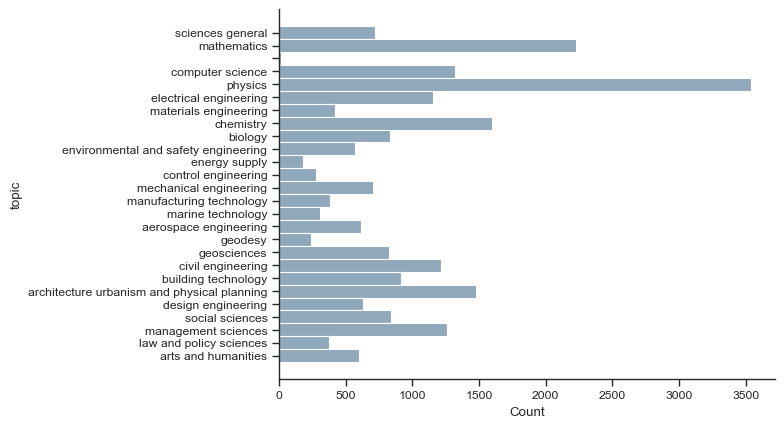

In [7]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(palette = sns.xkcd_palette(["grey blue"]), context="paper", style="ticks", rc=custom_params)
sns.histplot(data=catalog_df, y="topic")

<Axes: xlabel='shelf', ylabel='topic'>

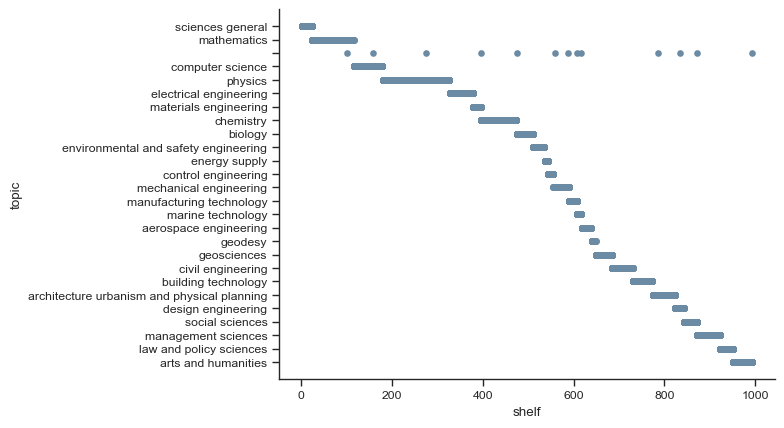

In [8]:
sns.scatterplot(data=catalog_df, y="topic", x="shelf", alpha=1.0, lw=0)

<Axes: xlabel='shelf', ylabel='sub_topic'>

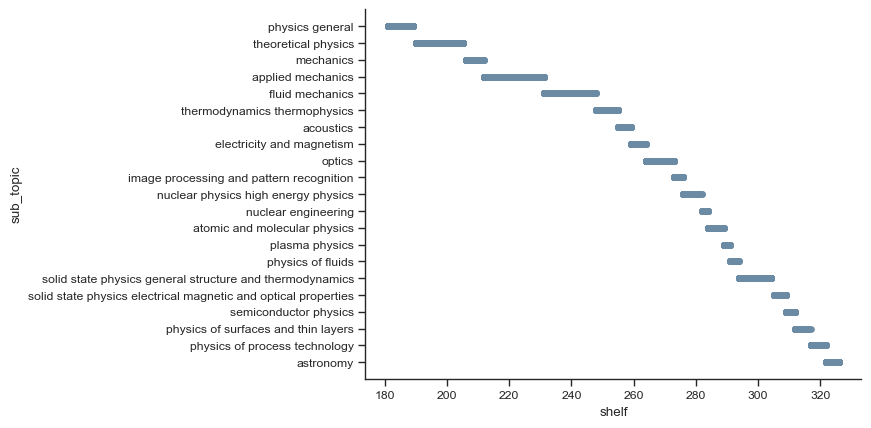

In [9]:
physics_df = catalog_df[catalog_df['topic'] == 'physics']
sns.scatterplot(data=physics_df, y="sub_topic", x="shelf", alpha=1.0, lw=0, legend="brief")


<Axes: xlabel='shelf', ylabel='Count'>

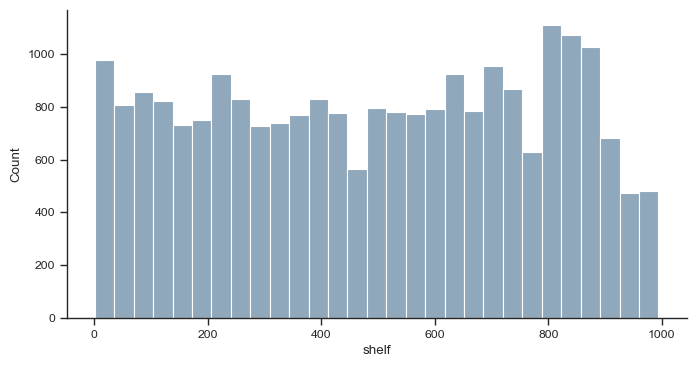

In [10]:
sns.set(rc={"figure.figsize":(8, 4)}) #width=8, height=4
sns.set_theme(palette = sns.xkcd_palette(["grey blue"]), context="paper", style="ticks", rc=custom_params)
sns.histplot(data=catalog_df, x='shelf')

<Axes: xlabel='year', ylabel='Count'>

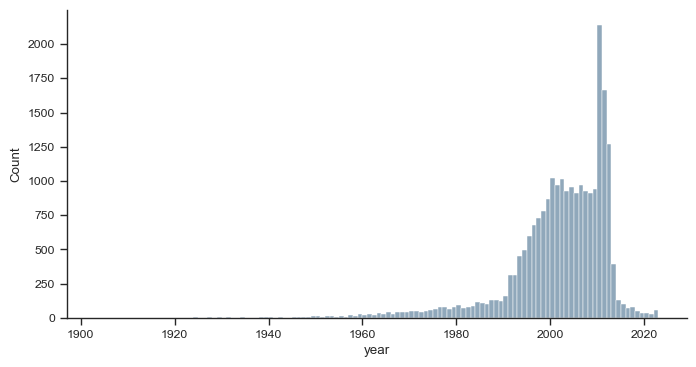

In [11]:
sns.histplot(data=catalog_df, x='year', binwidth=1)


## Interactivity with Altair
An alternative visualization using the [Altair package](https://altair-viz.github.io/) that supports interactivity. In the visualization below, mouseover any mark to see a tooltip showing more details for that data point.

In [12]:
alt.data_transformers.enable("vegafusion")
single = alt.selection_point(on='mouseover', nearest=True)
alt.Chart(catalog_df).mark_circle(size=60).encode(
    x='shelf',
    y=alt.Y('topic').sort(None),
    color=alt.Color('year', scale=alt.Scale(scheme="plasma")).sort("ascending"),
    tooltip=['title', 'authors', 'year', 'topic', 'sub_topic', 'sub_sub_topic'],
).properties(
    width=680,
    height=480,
).interactive(single)

alt.Chart(...)

## Distribution of title lengths

In [13]:
titles = catalog_df.title.to_list()
title_lengths = [len(t.split()) for t in titles]

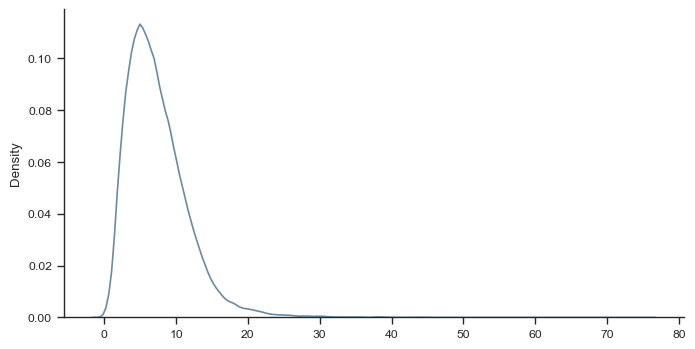

In [14]:
g = sns.kdeplot(title_lengths)